# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [73]:
medical.shape

(1338, 8)

In [74]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

These stats don't seem reasonable. Mean is heavily influenced by outliers and the distribution is right-tailed. 

<AxesSubplot:>

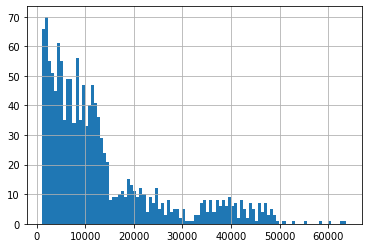

In [75]:
medical['charges'].hist(bins=100)
# there appear to be different groups. 

In [76]:
mean_charge = medical['charges'].mean()
std_charge = medical['charges'].std()

print('mean: ', round(mean_charge),'std: ', round(std_charge))

mean:  13270 std:  12110


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

The data is a random sample so we need to test the null hypotheses. 

The question is: How likely is would we be to get the sample mean of 13,720 with std of 12,110 assuming that the true population mean is less than 12,000.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__


One sided. The Admin only cares about if the true average cost is 12,000 or less. 

The Admin should not be concerned. The prob we would see a sample average  of 13270 if the true mean is 12000 is ~0.007%. 

In [77]:
charges  = np.array(medical['charges'])
standard_error = np.sqrt(np.sum((np.mean(charges) - charges)**2) / (len(charges)-1))
standard_error

12110.011236694001

In [78]:
# assuming that the true mean is 12000 or less. and the True Population standard devation is 12,110 what is the probabiltiy that we would get a sample mean of 13,720?



## Via BootStrapping

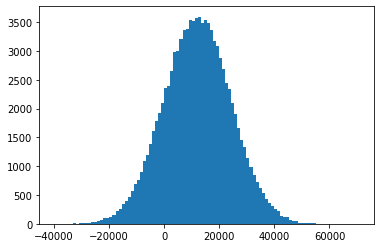

In [79]:
from scipy.stats import norm
norm_under_null = norm(loc = 12000, scale = standard_error)
sample_under_null = norm_under_null.rvs(100000)
plt.hist(sample_under_null, bins=100)
plt.show()

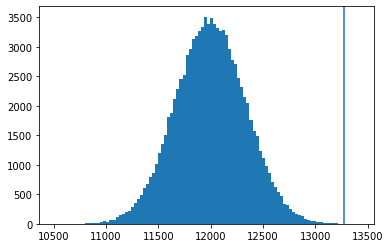

In [80]:
bootstrap_sample_under_null  = [np.mean(np.random.choice(sample_under_null, len(charges))) for i in range(100_000)]
plt.hist(bootstrap_sample_under_null, bins=100)
plt.axvline(x=13270) # our observation. 
plt.show()

# If you bootstrap samples under the null you can vizually see that only a tiny % of all random samples have a mean of 13,270 or greater. 

### Via T-test 

What is the probability that we would see a statistic at least as extreme as the one we observed, given that null hypothese is true. 

The null hypothesis is: the population average charge is less than 12,000.




In [81]:
from scipy.stats import ttest_1samp

t_value, p_value = ttest_1samp(a=charges,popmean=12_000,alternative='greater')

print(f'The prob of getting a sample mean of {np.mean(charges)} or greater, assuming that the population mean is {12_000} is {round(p_value*100,6)}%')


The prob of getting a sample mean of 13270.422265141257 or greater, assuming that the population mean is 12000 is 0.006509%


In [82]:
# sanity check just to make sure that the intutition is right. 
t_value, p_value = ttest_1samp(a=charges,popmean=13_270,alternative='greater')

print(f'The prob of getting a sample mean of {np.mean(charges)} or greater, assuming that the population mean is {13_270} is {round(p_value*100,6)}%')

The prob of getting a sample mean of 13270.422265141257 or greater, assuming that the population mean is 13270 is 49.949126%


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

The standard devation of each sample for each group is equal.

"The final assumption is the homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal. "

Source
https://www.investopedia.com/terms/t/t-test.asp


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [89]:
with_insurance = medical.loc[medical['insuranceclaim'] == 1]
no_insurance = medical.loc[medical['insuranceclaim'] == 0]
no_insurance_charges = no_insurance['charges']
with_insurance_charges = with_insurance['charges']

In [90]:
with_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,783.0,40.551724,14.749470,18.0000,26.000000,43.000,53.000000,64.00000
sex,783.0,0.518519,0.499976,0.0000,0.000000,1.000,1.000000,1.00000
bmi,783.0,32.635179,5.661491,15.9600,28.695000,32.300,36.192500,53.13000
children,783.0,0.679438,0.983586,0.0000,0.000000,0.000,1.000000,5.00000
smoker,783.0,0.318008,0.466000,0.0000,0.000000,0.000,1.000000,1.00000
region,783.0,1.535121,1.099165,0.0000,1.000000,2.000,2.000000,3.00000
charges,783.0,16423.928277,14045.928419,1131.5066,5733.288925,11538.421,23484.788875,63770.42801
insuranceclaim,783.0,1.000000,0.000000,1.0000,1.000000,1.000,1.000000,1.00000


In [85]:
no_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,555.0,37.309910,12.773414,18.0000,27.000000,36.00000,48.000000,64.00000
sex,555.0,0.486486,0.500268,0.0000,0.000000,0.00000,1.000000,1.00000
bmi,555.0,27.881586,5.590745,17.1950,23.700000,27.26500,31.730000,44.70000
children,555.0,1.681081,1.246331,0.0000,1.000000,2.00000,3.000000,5.00000
smoker,555.0,0.045045,0.207590,0.0000,0.000000,0.00000,0.000000,1.00000
region,555.0,1.488288,1.113321,0.0000,1.000000,1.00000,3.000000,3.00000
charges,555.0,8821.421892,6446.510127,1121.8739,4445.337575,6933.24225,11424.211575,36910.60803
insuranceclaim,555.0,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000


In absolute terms, people without insurance are charged on average 8.8k and people with insurance are charged 16.4k.

In [86]:
#pooled_std is the weighted std dev of two or more groups.

n_0 = len(no_insurance_charges)
n_1 = len(with_insurance_charges)

s_0 = np.std(no_insurance_charges, ddof=1)
s_1 = np.std(with_insurance_charges, ddof=1)

denominator = ((n_0 - 1) * s_0**2) + ((n_1 - 1) * s_1**2)
numerator = n_0 + n_1 - 2

pooled_standard_deviation = np.sqrt(denominator / numerator)
pooled_standard_deviation

11520.034268775262

In [87]:
denominator = np.mean(no_insurance_charges) - np.mean(with_insurance_charges)
numerator =  pooled_standard_deviation * np.sqrt((1/n_0) + (1/n_1))

t_stat = denominator / numerator
t_stat

-11.89329903087671

In [88]:
from scipy.stats import ttest_ind

t_value, p_value = ttest_ind(no_insurance_charges, with_insurance_charges)

print(t_value, p_value)

-11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

You would use statsmodels.stats.weightstats.ztest

Source: https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test